In [115]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [116]:
df=pd.read_csv("3000DComets.csv")

In [117]:
df

,object,day,e,a,ma,n,omega,Omega,inclination,x,y,z
0,P/2004 R1 (McNaught),0,0.682527,3.106380,7552.620595,1.146567,0.626838,295.985450,4.894556,1.373165,0.270136,0.115838
1,P/2004 R1 (McNaught),1,0.682527,3.106380,7552.620595,1.146567,0.626838,295.985450,4.894556,1.378606,0.287270,0.116900
2,P/2004 R1 (McNaught),2,0.682527,3.106380,7552.620595,1.146567,0.626838,295.985450,4.894556,1.383902,0.304373,0.117949
3,P/2004 R1 (McNaught),3,0.682527,3.106380,7552.620595,1.146567,0.626838,295.985450,4.894556,1.389056,0.321445,0.118987
4,P/2004 R1 (McNaught),4,0.682527,3.106380,7552.620595,1.146567,0.626838,295.985450,4.894556,1.394070,0.338485,0.120012
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,13P/Olbers,2995,0.930297,16.906777,600.013714,0.090380,64.641207,86.103128,44.609886,20.111163,-12.839414,-20.654053
29996,13P/Olbers,2996,0.930297,16.906777,600.013714,0.090380,64.641207,86.103128,44.609886,20.110943,-12.838355,-20.653765
29997,13P/Olbers,2997,0.930297,16.906777,600.013714,0.090380,64.641207,86.103128,44.609886,20.110724,-12.837297,-20.653478
29998,13P/Olbers,2998,0.930297,16.906777,600.013714,0.090380,64.641207,86.103128,44.609886,20.110504,-12.836238,-20.653191


In [118]:
df.isnull().sum()

,0
object,0
day,0
e,0
a,0
ma,0
n,0
omega,0
Omega,0
inclination,0
x,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   object       30000 non-null  object 
 1   day          30000 non-null  int64  
 2   e            30000 non-null  float64
 3   a            30000 non-null  float64
 4   ma           30000 non-null  float64
 5   n            30000 non-null  float64
 6   omega        30000 non-null  float64
 7   Omega        30000 non-null  float64
 8   inclination  30000 non-null  float64
 9   x            30000 non-null  float64
 10  y            30000 non-null  float64
 11  z            30000 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.7+ MB


In [120]:
df.dropna(inplace=True)

# Anomalie detection

Using Isolation Forest:	Randomly separates data to detect which points are easiest to isolate = anomalies

Contamination:	Your estimate of how many anomalies exist (affects sensitivity)

In [121]:
df_anomalie=df.copy()
features = ['e', 'a', 'ma', 'n', 'omega', 'Omega', 'inclination']
X = df[features]

In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [123]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_anomalie['anomaly'] = model.fit_predict(X_scaled)

In [124]:
df_anomalie.head()

,object,day,e,a,ma,n,omega,Omega,inclination,x,y,z,anomaly
0,P/2004 R1 (McNaught),0,0.682527,3.10638,7552.620595,1.146567,0.626838,295.98545,4.894556,1.373165,0.270136,0.115838,1
1,P/2004 R1 (McNaught),1,0.682527,3.10638,7552.620595,1.146567,0.626838,295.98545,4.894556,1.378606,0.287270,0.116900,1
2,P/2004 R1 (McNaught),2,0.682527,3.10638,7552.620595,1.146567,0.626838,295.98545,4.894556,1.383902,0.304373,0.117949,1
3,P/2004 R1 (McNaught),3,0.682527,3.10638,7552.620595,1.146567,0.626838,295.98545,4.894556,1.389056,0.321445,0.118987,1
4,P/2004 R1 (McNaught),4,0.682527,3.10638,7552.620595,1.146567,0.626838,295.98545,4.894556,1.394070,0.338485,0.120012,1


In [125]:
df_anomalie['is_anomaly'] = df_anomalie['anomaly'] == -1


In [126]:
anomaly_count = df_anomalie['is_anomaly'].sum()


Eccentricity and semi-major axis are key orbital parameters that tell us about a comet's motion.

np.int64(0)

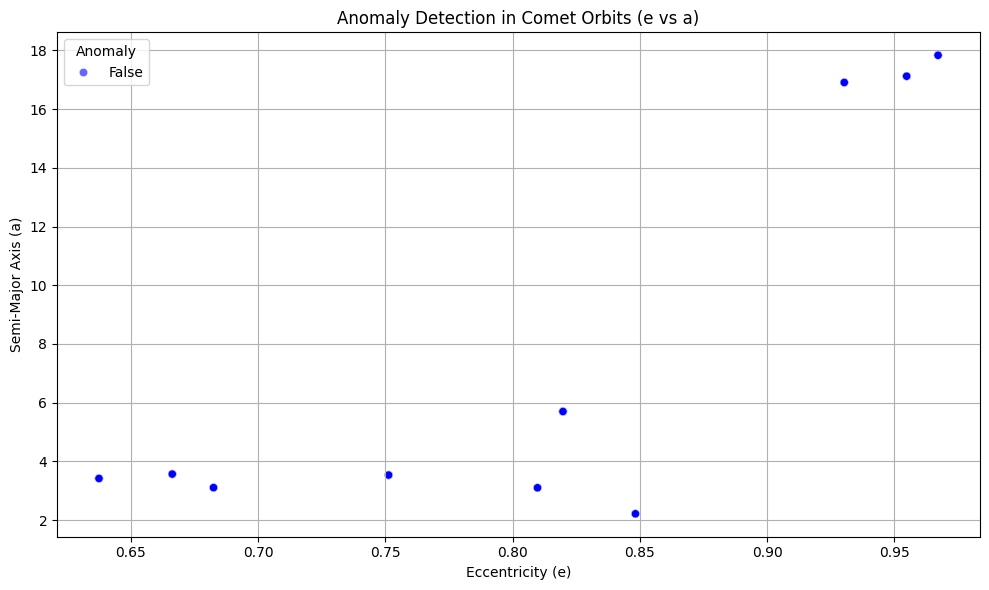

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_anomalie, x='e', y='a', hue='is_anomaly', palette={False: 'blue', True: 'red'}, alpha=0.6)
plt.title("Anomaly Detection in Comet Orbits (e vs a)")
plt.xlabel("Eccentricity (e)")
plt.ylabel("Semi-Major Axis (a)")
plt.legend(title="Anomaly")
plt.grid(True)
plt.tight_layout()

anomaly_count

No anomaly

# Understand the context of the database
    The database shows the evolution of 6 comets during 3000 days, let's visualise them!

In [128]:
df_predd=df.copy()
comets=df_predd['object'].unique().tolist()
comets

['P/2004 R1 (McNaught)',
 'P/2008 S1 (Catalina-McNaught)',
 '1P/Halley',
 '2P/Encke',
 '3D/Biela',
 '5D/Brorsen',
 '7P/Pons-Winnecke',
 '8P/Tuttle',
 '12P/Pons-Brooks',
 '13P/Olbers']

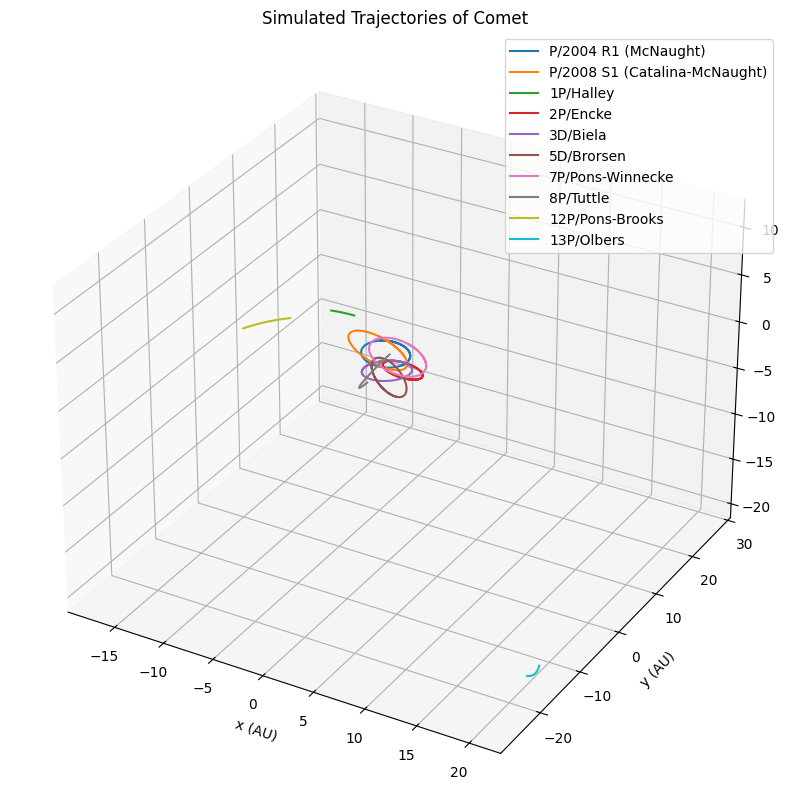

In [129]:
from mpl_toolkits.mplot3d import Axes3D


fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for comet in comets:
  comet_data = df_predd[df_predd['object'] == comet]
  ax.plot(comet_data['x'], comet_data['y'], comet_data['z'], label=comet)
plt.title("Simulated Trajectories of Comet")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.legend()
plt.grid(True)
plt.show()

# Classification
    Since the database contains 6 unique comets, we'll rearange it and then train a model to classify them.

In [130]:
df_classe=df.copy()
comets_features=[]
for comet in comets:
  comet_data = df_classe[df_classe['object'] == comet].sort_values('day')
  x=comet_data['x'].values
  y=comet_data['y'].values
  z=comet_data['z'].values
  origin_dist=np.sqrt(x[0]**2+y[0]**2+z[0]**2)
  total_dist=np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2))
  features={'comet':comet,'range_x':x.min()-x.max(),'range_y':y.min()-y.max(),'range_z':z.min()-z.max(),'origin_dist':origin_dist.mean(),'total_dist':total_dist.max()}
  comets_features.append(features)
df_Classe=pd.DataFrame(comets_features)
df_Classe.head()


,comet,range_x,range_y,range_z,origin_dist,total_dist
0,P/2004 R1 (McNaught),-4.909557,-5.912872,-0.387440,1.404270,24.264111
1,P/2008 S1 (Catalina-McNaught),-6.128818,-6.285818,-1.472661,3.385691,23.266990
2,1P/Halley,-3.508835,-2.482491,-1.371956,33.179133,4.522504
3,2P/Encke,-4.251546,-2.610897,-0.486858,3.380027,24.349604
4,3D/Biela,-4.947383,-6.743597,-1.337622,2.019746,26.846104


In [131]:
df_Classe['Type']=df_Classe['range_x'].apply(lambda x:'short' if x<10 else 'long')
df_Classe.head()

,comet,range_x,range_y,range_z,origin_dist,total_dist,Type
0,P/2004 R1 (McNaught),-4.909557,-5.912872,-0.387440,1.404270,24.264111,short
1,P/2008 S1 (Catalina-McNaught),-6.128818,-6.285818,-1.472661,3.385691,23.266990,short
2,1P/Halley,-3.508835,-2.482491,-1.371956,33.179133,4.522504,short
3,2P/Encke,-4.251546,-2.610897,-0.486858,3.380027,24.349604,short
4,3D/Biela,-4.947383,-6.743597,-1.337622,2.019746,26.846104,short


In [132]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

le=LabelEncoder()
y=le.fit_transform(df_Classe['Type'])
X=df_Classe.drop(columns=['comet','Type'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [133]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[2]])

In [134]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

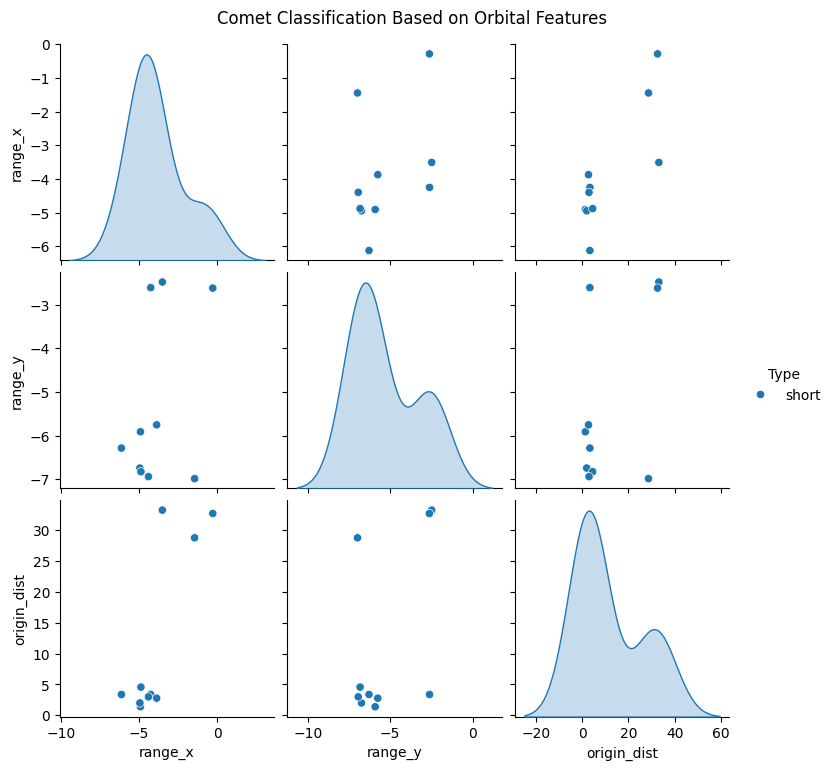

In [135]:
sns.pairplot(df_Classe,hue='Type',vars=["range_x", "range_y", "origin_dist"])
plt.suptitle("Comet Classification Based on Orbital Features", y=1.02)
plt.show()

Only one class

# Prediction of trajectories
    The evolution of the trajectory of a comet in years is generally calculated by solving the Kepler's equation: 0=E-e.sin(E)-M

    M is the mean anomaly M=n⋅t(M indicates the position of an object in its orbit at a certain time).
    n=2 PI/P which is the mean movement of an object which depends on P:the orbitary period.
    t:the time between the passage of the last perihelia.
    From E we can find the position of the comet:
    x=a⋅(cos(E)−e)
    y=a⋅1−e2⋅sin⁡(E)
    z=0
    E is the excentricity anomaly.

    After finding the x and y position of a comet we can predict it evolution by the propagation formula which is calculated by:
    Mfuture=M0- 2Pi (t/T). T=np.sqrt(a**3).

    Since the dataset contains only 6 comets with their 3000 days evolution, we'll consider only the day 0 and then predict their trajectory by years using the previous procedure.We'll then consider predicting according to days with Deep Learning predictors.
    
    

## Kepler's law

In [136]:
df_pred=df.copy()
df_pred=df_pred.drop_duplicates(subset='object', keep='first').copy()
df_pred.head()

,object,day,e,a,ma,n,omega,Omega,inclination,x,y,z
0,P/2004 R1 (McNaught),0,0.682527,3.106380,7552.620595,1.146567,0.626838,295.985450,4.894556,1.373165,0.270136,0.115838
3000,P/2008 S1 (Catalina-McNaught),0,0.666313,3.568137,6139.501679,0.932223,203.649023,111.392003,15.100746,0.334890,3.343650,-0.413226
6000,1P/Halley,0,0.967143,17.834144,550.694534,0.083420,111.332485,58.420081,162.262691,-17.098990,26.915261,-9.167777
9000,2P/Encke,0,0.848268,2.215043,12530.245524,1.903996,186.540346,334.569806,11.779995,2.784119,-1.913357,-0.111038
12000,3D/Biela,0,0.751299,3.534658,6389.652790,0.944840,221.658800,250.669000,13.216400,1.968726,0.152877,0.424404


In [137]:
def mean_anomaly_eq(E,e,M):
  return E - e*np.sin(E) - M

In [138]:
from scipy.optimize import fsolve
def position(a,e,M):
  E=fsolve(mean_anomaly_eq,x0=M,args=(e,M))
  x=a*(np.cos(E)-e)
  y=a*(1-e**2)*np.sin(E)
  z=0
  return x,y

In [139]:
def predict_trajectory(row,year):
  a=row["a"]
  e=row["e"]
  M0=row["ma"]
  M0=np.radians(M0)
  T=np.sqrt(a**3)
  t=year*T
  Mi=M0 +2*np.pi*(t/T)
  x,y=position(a,e,Mi)
  return x,y
n=20
for index,row in df_pred.iterrows():
  x,y=predict_trajectory(row,n)
  print(f"Comet {row['object']} - Predicted Position in {n} years: x = {x}, y = {y}")


Comet P/2004 R1 (McNaught) - Predicted Position in 20 years: x = [0.75840584], y = [-0.62368272]
Comet P/2008 S1 (Catalina-McNaught) - Predicted Position in 20 years: x = [0.02068963], y = [1.46903931]
Comet 1P/Halley - Predicted Position in 20 years: x = [-35.0019682], y = [-0.10929207]
Comet 2P/Encke - Predicted Position in 20 years: x = [-2.78395032], y = [-0.56697596]
Comet 3D/Biela - Predicted Position in 20 years: x = [-4.70438651], y = [-1.25452111]
Comet 5D/Brorsen - Predicted Position in 20 years: x = [-5.59482285], y = [0.11352706]
Comet 7P/Pons-Winnecke - Predicted Position in 20 years: x = [-2.68574708], y = [2.00688332]
Comet 8P/Tuttle - Predicted Position in 20 years: x = [-10.28121292], y = [0.33337926]
Comet 12P/Pons-Brooks - Predicted Position in 20 years: x = [-31.8090012], y = [-0.64959515]
Comet 13P/Olbers - Predicted Position in 20 years: x = [-30.08633128], y = [-1.20106912]


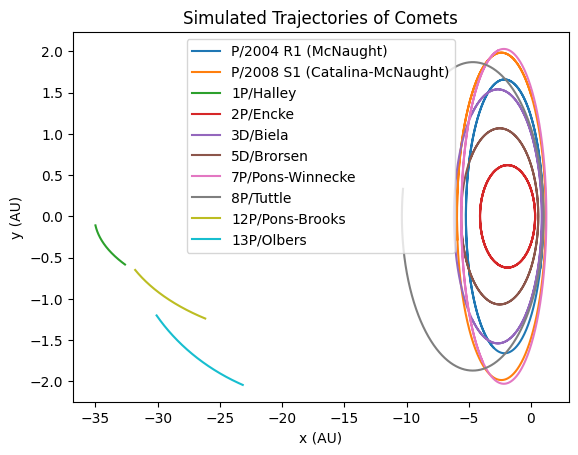

In [140]:
def simulate_trajectory(row,year,time_step=1):
  a=row["a"]
  e=row["e"]
  M0=row["ma"]
  M0=np.radians(M0)
  T=np.sqrt(a**3)
  x=[]
  y=[]
  for t in range(0,year*365,time_step):
    elapsedT=t/365
    Mi=M0 +2*np.pi*(elapsedT/T)
    x_pos,y_pos=position(a,e,Mi)
    x.append(x_pos)
    y.append(y_pos)
  return np.array(x),np.array(y)

n=10
for index,row in df_pred.iterrows():
  x,y=simulate_trajectory(row,n,time_step=1)
  plt.plot(x, y, label=row['object'])

plt.title('Simulated Trajectories of Comets')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.show()

## LSTM

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.preprocessing import MinMaxScaler

In [162]:
#I want to create sequence of my data with step=30 days
def create_sequences(data,n_steps):
  X,y=[],[]
  for i in range(len(data)-n_steps):
    X.append(data[i:i+n_steps])
    y.append(data[i+n_steps])
  return np.array(X),np.array(y)

In [163]:
df_ten=df.copy()
scaler = MinMaxScaler()
df_ten[['x', 'y', 'z']] = scaler.fit_transform(df_ten[['x', 'y', 'z']])
n_steps = 30
n_features=3

comet_name=df_ten['object'].unique()
all_X = []
all_y = []

for comet in comet_name:
  comet_data=df_ten[df_ten['object']==comet].sort_values('day')[['x','y','z']].values
  if len(comet_data)>n_steps:
    X_seq,y_seq=create_sequences(comet_data,n_steps)
    all_X.append(X_seq)
    all_y.append(y_seq)

X=np.vstack(all_X)
y=np.vstack(all_y)

In [164]:
i=int(len(X)*0.8)
X_train,X_test=X[:i],X[i:]
y_train,y_test=y[:i],y[i:]

In [165]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam',loss='mse')
model.summary()
model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,611 (205.51 KB)

 Trainable params: 52,611 (205.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - loss: 0.0208 - val_loss: 0.0601
Epoch 2/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - loss: 1.5296e-04 - val_loss: 0.0650
Epoch 3/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - loss: 8.8636e-05 - val_loss: 0.0648
Epoch 4/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 5.9653e-05 - val_loss: 0.0671
Epoch 5/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - loss: 4.8027e-05 - val_loss: 0.0694
Epoch 6/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - loss: 4.5313e-05 - val_loss: 0.0717
Epoch 7/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 3.1224e-05 - val_loss: 0.0720
Epoch 8/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - loss: 2.8377e-05 - val_loss: 0.0725
Epoch 9/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 2.7448e-05 - val_loss: 0.0713
Epoch 10/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 2.3216e-05 - val_loss: 0.0726
Epoch 11/100
743/743 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 2.5977e-0

In [166]:
for comet in comet_name:
  comet_data=df_ten[df_ten['object']==comet].sort_values('day')[['x','y','z']].values
  last_days=comet_data[-n_steps:].reshape(1,n_steps,n_features)
  pred=model.predict(last_days)
  print(f"The prediction of x,y and z for {comet} in the next 30 days is {pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
The prediction of x,y and z for P/2004 R1 (McNaught) in the next 30 days is [0.38587153 0.57603097 0.63111895]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The prediction of x,y and z for P/2008 S1 (Catalina-McNaught) in the next 30 days is [0.3824905 0.5807233 0.6382892]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The prediction of x,y and z for 1P/Halley in the next 30 days is [0.09500593 0.95267963 0.39535964]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The prediction of x,y and z for 2P/Encke in the next 30 days is [0.5470475 0.4855516 0.6389431]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The prediction of x,y and z for 3D/Biela in the next 30 days is [0.4370727  0.41019148 0.6367178 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The prediction of x,y and z for 5D/Brorsen in the next 30 days is [0.53193617 0.40638304 0.60057974]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The prediction of x,y and z for 7P/Pons-Winnecke in the next 30 days is [0.4516166  0.59466565 0.62992704]
1/

In [167]:
comet_pred={}
for comet in comet_name:
  comet_data=df_ten[df_ten['object']==comet].sort_values('day')[['x','y','z']].values
  last_days=comet_data[-n_steps:].reshape(1,n_steps,n_features)
  prediction=[]
  for _ in range(30):
    pred=model.predict(last_days,verbose=0)[0]
    prediction.append(pred)
    last_days=np.append(last_days[:,1:,:],[[pred]],axis=1)

  comet_pred[comet] = np.array(prediction)



In [168]:
prediction

[array([0.16755077, 0.43300486, 0.446835  ], dtype=float32),
 array([0.16778785, 0.41195583, 0.44489837], dtype=float32),
 array([0.17899771, 0.38145506, 0.4450358 ], dtype=float32),
 array([0.19221622, 0.3504024 , 0.44320473], dtype=float32),
 array([0.20086563, 0.31722507, 0.4376905 ], dtype=float32),
 array([0.20131032, 0.28363985, 0.42938772], dtype=float32),
 array([0.19578601, 0.25231874, 0.421466  ], dtype=float32),
 array([0.15982227, 0.22956638, 0.41048074], dtype=float32),
 array([0.12016122, 0.24651475, 0.3788035 ], dtype=float32),
 array([0.10344798, 0.28507745, 0.36012283], dtype=float32),
 array([0.1195633 , 0.3386091 , 0.34987545], dtype=float32),
 array([0.15996918, 0.39602405, 0.3504533 ], dtype=float32),
 array([0.20692457, 0.461259  , 0.35696602], dtype=float32),
 array([0.24606007, 0.51141137, 0.36569753], dtype=float32),
 array([0.26952237, 0.53132266, 0.3827377 ], dtype=float32),
 array([0.29067755, 0.54647374, 0.39486313], dtype=float32),
 array([0.3085143 , 0.56

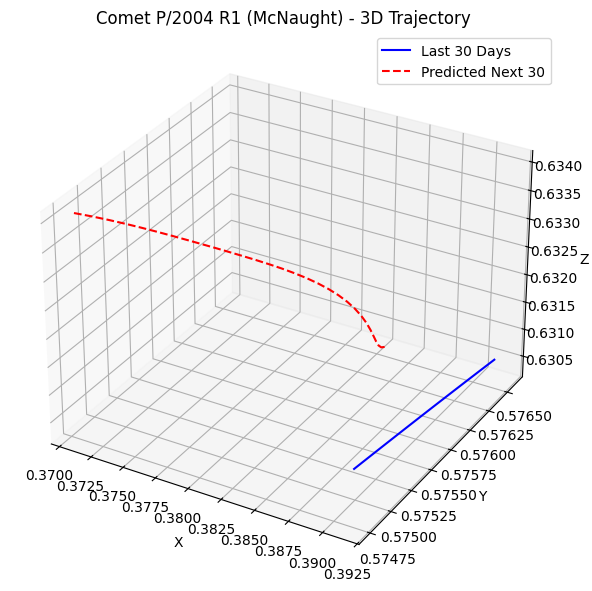

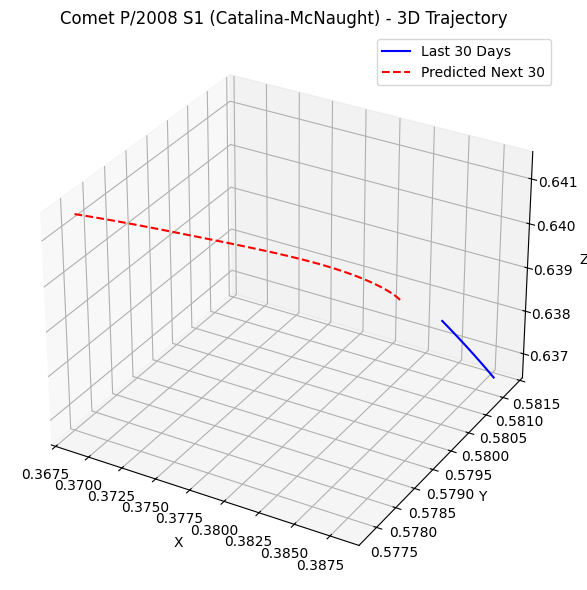

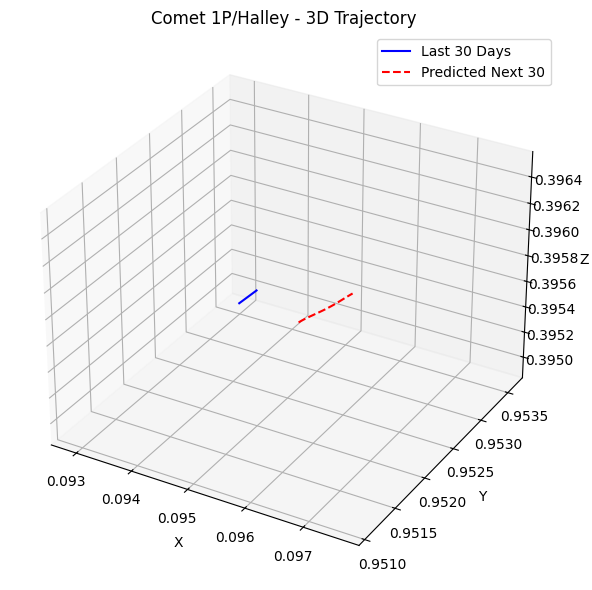

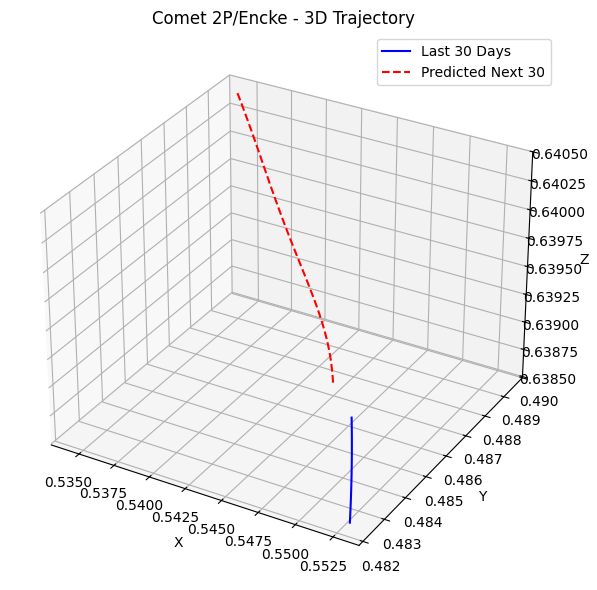

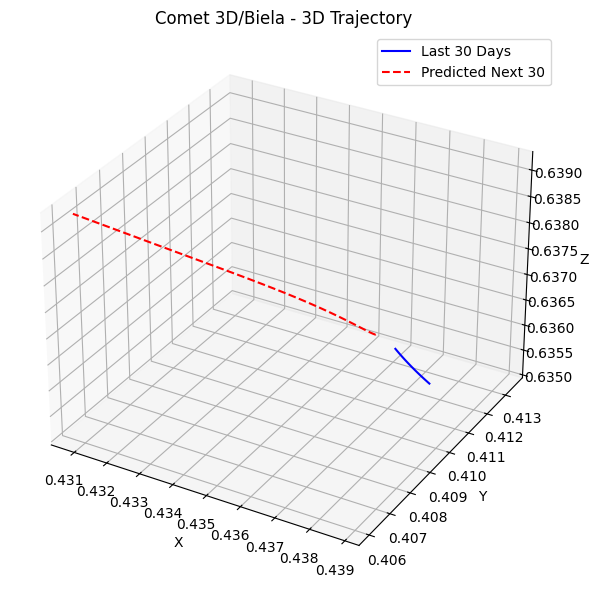

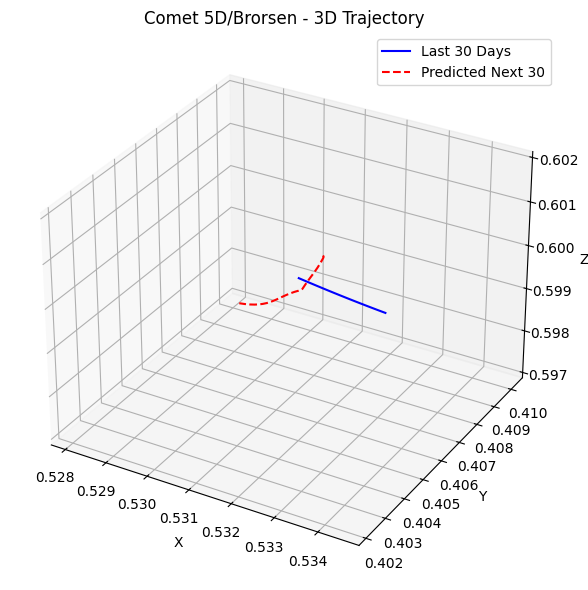

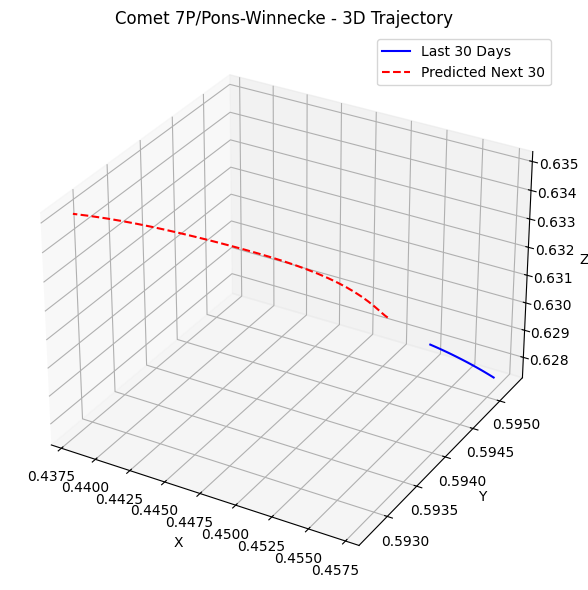

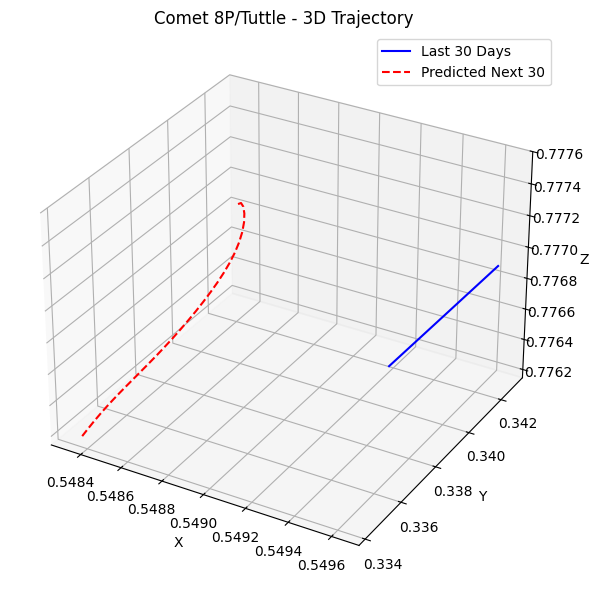

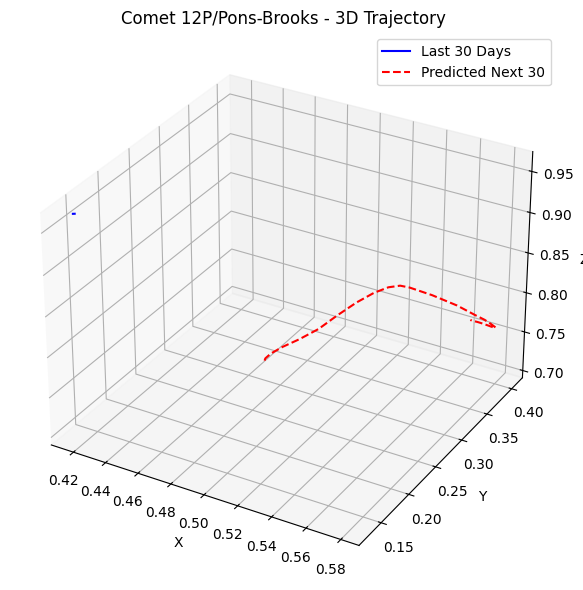

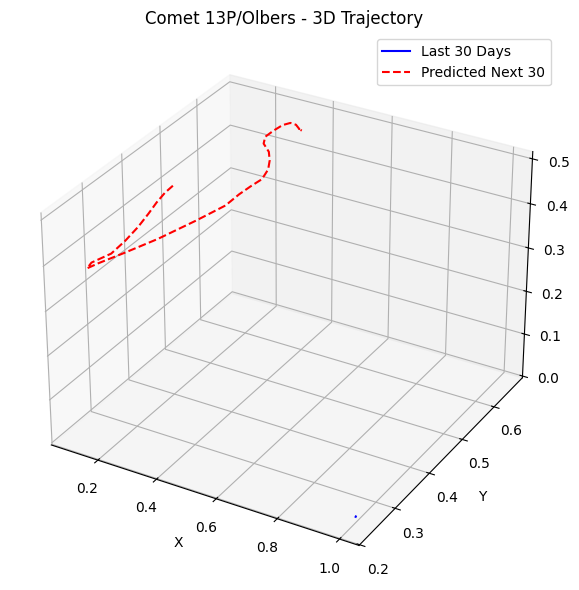

In [169]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for comet in comet_name:
    comet_data = df_ten[df_ten['object'] == comet].sort_values('day')[['x', 'y', 'z']].values
    past_30 = comet_data[-n_steps:]

    predicted_30 = comet_pred[comet]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(past_30[:, 0], past_30[:, 1], past_30[:, 2], label="Last 30 Days", color='blue')
    ax.plot(predicted_30[:, 0], predicted_30[:, 1], predicted_30[:, 2], label="Predicted Next 30", color='red', linestyle='--')

    ax.set_title(f"Comet {comet} - 3D Trajectory")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.tight_layout()
    plt.show()
